## Solution to the first lab assignment WUM
author: Wiktoria Markowicz

First, let's load the dataset from the file stored on Google Drive.

In [2]:
!pip install gdown
!gdown https://drive.google.com/uc?id=17XblyoHUNcGE8fkl3D00h8W0k8vGbq5V

Downloading...
From: https://drive.google.com/uc?id=17XblyoHUNcGE8fkl3D00h8W0k8vGbq5V
To: /content/earnings.csv
100% 668k/668k [00:00<00:00, 78.3MB/s]


Next, let's import all the necessary Python libraries.

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, confusion_matrix, silhouette_score
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
import statsmodels.api as sm
from scipy.stats import norm

**Task 1.**  Data description (3 points total) Download and load the data, describe and summarize
them in a few sentences. Leading questions:


• how many observations are there in the sample? Discuss the structure of the dataset:
how many quantitative and how many qualitative variables do we have? Are there any
missing data? (0.5 point)

Based on the code below, we can see that **the dataset contains 11000 observations** and 15 variables. These variables can be divided into two main groups: quantitative variables and qualitative variables.

The **quantitative variables** are:

*base, bonus, overtime_pay, other, age, duration_total, duration_entity, duration_nominal, duration_overtime.*

These are quantitive variables, because they are numeric values that can be used in mathematical operations like summing, averaging, or comparing. They have real numerical meaning.

The **qualitative variables** are:

*sector, section_07, sex, education, contract.*

These are qualitive variables, because they describe categories or groups, such as gender, education level, or contract type. Even though they are coded as numbers, the numbers represent different categories, not amounts.


In [12]:
df = pd.read_csv('earnings.csv', sep = ';')
df = pd.DataFrame(df)
print(f"Number of observations: {df.shape[0]}")
print(f"Number of variables: {df.shape[1]}")
print()

print("Data types of the variables:")
print(df.dtypes)
print()

missing_data = df.isnull().sum()
print("Missing data:")
print(missing_data)

Number of observations: 11000
Number of variables: 15

Data types of the variables:
id                     int64
base                 float64
bonus                float64
overtime_pay         float64
other                float64
sector                 int64
section_07             int64
sex                    int64
education              int64
contract               int64
age                    int64
duration_total       float64
duration_entity      float64
duration_nominal     float64
duration_overtime    float64
dtype: object

Missing data:
id                   0
base                 0
bonus                0
overtime_pay         0
other                0
sector               0
section_07           0
sex                  0
education            0
contract             0
age                  0
duration_total       0
duration_entity      0
duration_nominal     0
duration_overtime    0
dtype: int64


• Provide and describe appropriate frequency tables or descriptive statistics for the variables
(take into account the type of the variables!) (0.5 point).


Using the code below, we obtain a table with descriptive statistics such as count, mean, standard deviation, etc., for all quantitative variables. Let's analyze them:
- Base: The mean is around 33377 PLN, but the range of this variable is very large, as the maximum value is as high as 241624.39 PLN.
- Bonus and overtime_pay: Most employees receive little or no bonuses/overtime. The median is 620 PLN for the bonus and 0 PLN for overtime pay. Both of these variables have large standard deviations and extreme maximum values, with 258061.00 PLN and 228110.34 PLN respectively.
- Other: We can also observe skewed distributions here, as the mean is 2477.63 PLN, while the maximum is 88555.76 PLN.
- Age: The average employee age is 42.5 years, with a relatively symmetric distribution, as the minimum age is 19 and the maximum is 77.
- Employment durations (total, in current entity, nominal hours, and overtime) vary significantly, but most employees have been working for over 9 years and have no overtime (median = 0h).


We also computed frequency tables for all categorical variables:

- Sector: The sample is dominated by the public sector (≈ 96% of observations).
- Section 07 (NACE code): Most employees work in Education (section 2) (53%), followed by Health and Social Work (section 3) (25%) and Public Administration (section 1) (22%).
- Sex: The dataset is female-dominated — 75% of observations are women.
- Education: The majority of employees (≈ 60%) have higher education (category 2). Only 430 hold a doctoral degree, while 368 have basic education or less.
- Contract type: Most contracts are for an indefinite period (≈ 85%).

In [13]:
quantitative = ['base', 'bonus', 'overtime_pay', 'other', 'age', 'duration_total', 'duration_entity', 'duration_nominal', 'duration_overtime']

print(df[quantitative].describe().T)

categorical_columns = ['sector', 'section_07', 'sex', 'education', 'contract']
for col in categorical_columns:
    print(f"Frequency table for {col}:")
    print(df[col].value_counts())
    print("\n")


                     count          mean           std    min        25%  \
base               11000.0  33376.738065  19276.551638  10.00  20995.115   
bonus              11000.0   2128.486176   4966.444726   0.00      0.000   
overtime_pay       11000.0   1679.273923   5407.964344   0.00      0.000   
other              11000.0   2477.625815   3715.419120   0.00      0.000   
age                11000.0     42.470182     10.012140  19.00     34.000   
duration_total     11000.0     18.567080     10.996950   0.01      9.030   
duration_entity    11000.0     11.401382      9.322181   0.01      3.070   
duration_nominal   11000.0   1301.307435    540.189234  12.80    766.800   
duration_overtime  11000.0     47.702325    111.963867   0.00      0.000   

                         50%         75%        max  
base               31341.245  41348.2900  241624.39  
bonus                620.000   2940.7175  258061.00  
overtime_pay           0.000   1139.3300  228110.34  
other               214

Present and discuss (where appropriate) variables’ distributions, e.g.. compare them`
with the normal, or other distribution by making histograms and plotting them together with a known
density function . (2 points)

Using the code below, we can observe several patterns from the histograms and the normal distribution:
- base: The distribution of this variable is highly right-skewed. Most values are below the mean, and we can see a long tail of higher salaries. Although the histogram is not symmetric, overall it roughly resembles a normal distribution.
- bonus, overtime pay, other, duration_overtime: These variables are extremely right-skewed. The observations peak on the left side, with only a small number of values on the right. These distributions are highly asymmetric and clearly deviate from the normal distribution.
- age: This variable is relatively symmetric and most closely resembles a normal distribution. However, we can still notice a slight skew toward younger individuals.
- duration_total: The values of this variable are more spread out. The distribution deviates from normality and shows signs of possibly two peaks.
- duration_entity: This distribution is clearly right-skewed. On the histogram, we see a high concentration of values on the left side and a long right tail, which indicates a lack of normality.
- duration_nominal: This variable also does not resemble a normal distribution. There are clearly two peaks in the histogram, with the second one being significantly higher.



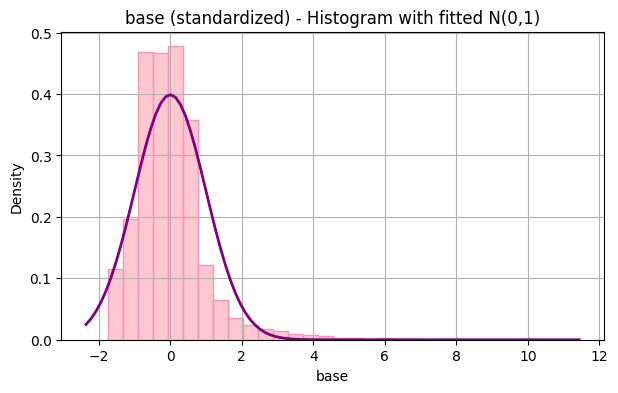

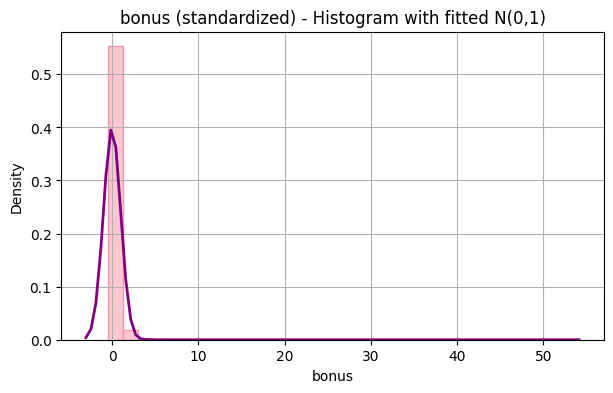

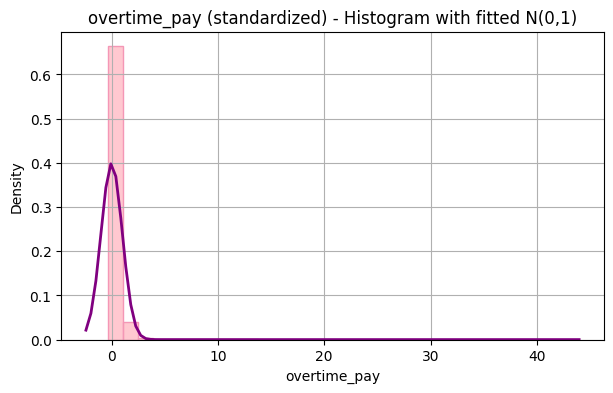

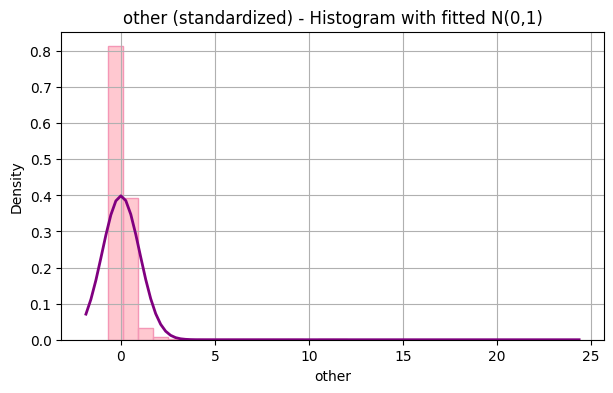

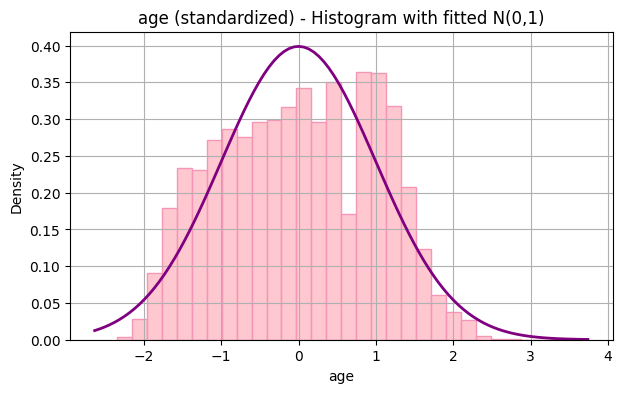

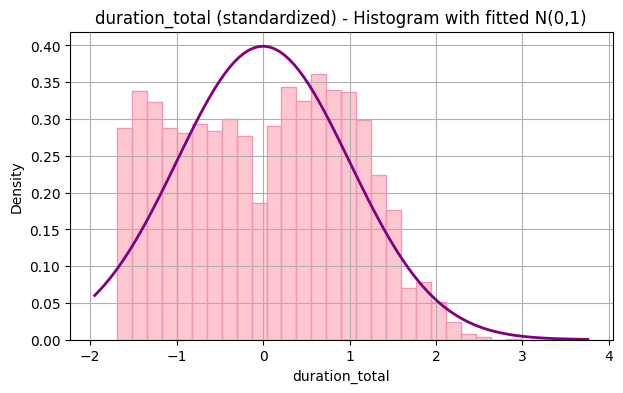

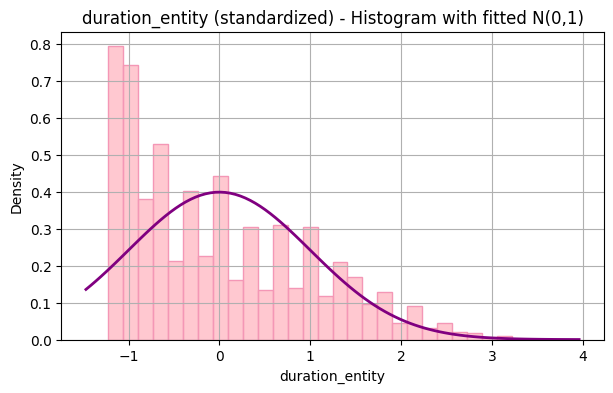

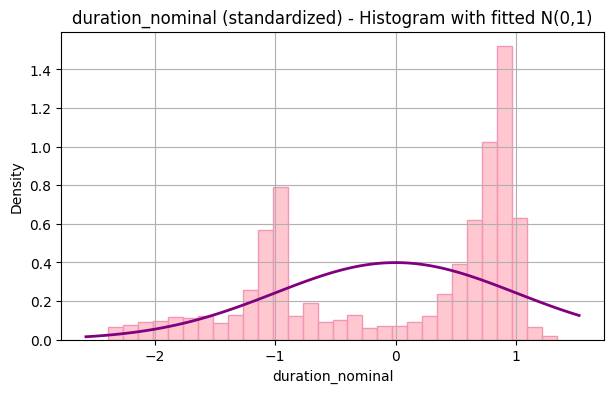

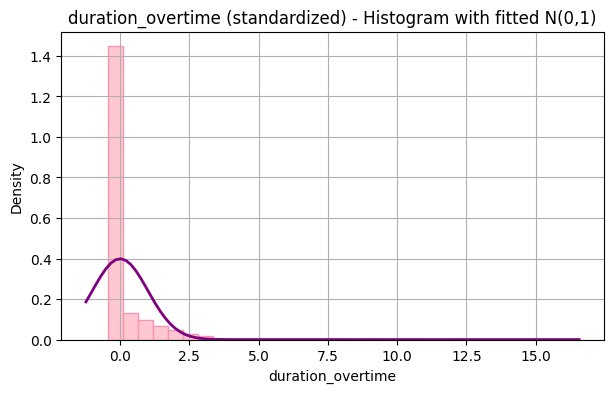

In [24]:
scaler = StandardScaler()
df_scaled = df.copy()
df_scaled[quantitative] = scaler.fit_transform(df[quantitative])

def plot_standardized(variable):
    data = df_scaled[variable].dropna()
    mu, std = norm.fit(data)

    plt.figure(figsize=(7, 4))
    sns.histplot(data, bins=30, kde=False, stat="density", color="lightpink", edgecolor="#F497B6")

    xmin, xmax = plt.xlim()
    x = np.linspace(xmin, xmax, 100)
    p = norm.pdf(x, mu, std)
    plt.plot(x, p, color='purple', linewidth=2)
    plt.title(f'{variable} (standardized) - Histogram with fitted N(0,1)')
    plt.xlabel(variable)
    plt.ylabel('Density')
    plt.grid(True)
    plt.show()

for var in quantitative:
    plot_standardized(var)

**Task 2.** Clustering (7 points total) Explore clustering of the samples. Using the clustering method of
your choice and an appropriate distance measure to perform a clustering analysis of the data. (3
points) Describe your approach, in particular choice of variables and their transformations (coding,
scaling), including justification of your choices. (2 points). Choose the optimal number of clusters
based on the average silhouette score. (2 points)


In this task, I decided to use the K-means clustering using Euclidean distance and group the data into three sets: salary, work_time and a key_mix set. After exploring various clustering options, I found this approach to be the most effective.

The salary set includes variables related to compensation such as: base, bonus, Overtime_py and other. I chose this group to illustrate the structure of employee compensation. Moreover, it allows identification of groups of employees with similar pay models.

The work_time set includes variables related to working hours, such as duration_total, duration_nominal, and duration_overtime. This enables clustering of employees based on their actual working time, taking into account both standard and overtime hours. The variable duration_entity was excluded from this set because, as shown at the beginning of the code below, it has a high correlation (0.65) with duration_total, which could reduce the quality of the clustering.

The last group is the key_mix set, a set of variables I considered crucial: base, bonus, and duration_total, as it combines information on both compensation and experience. This may help form more comprehensive clusters.

All variables were log-transformed (np.log10(x + 1)) to reduce the influence of large outliers and improve variable distribution.

Next, the data was standardized using StandardScaler() so that each variable had a mean of 0 and a standard deviation of 1, since the KMeans algorithm is sensitive to scale.

For each variable set, clustering was performed with the number of clusters ranging from 2 to 7. The optimal number of clusters was selected based on the silhouette score.

In addition, for each set, I visualized the clustering results in two dimensions using Principal Component Analysis (PCA). This made it possible to visually assess the separation between clusters. Colors corresponded to cluster assignment.

**- Set: salary**
Best silhouette score: 0.485 for 6 clusters
Plot: We can observe a clear division into groups, although some of them slightly overlap. The data is fairly well spread out, but some clusters are relatively close to each other.

**- Set: work_time**
Best silhouette score: 0.503 for 3 clusters
Plot: This is the clearest plot — the clusters are well separated, and a clear structure is visible. This is the highest score among all sets, suggesting that working time naturally divides employees into three distinct groups.

**- Set: key_mix**
Best silhouette score: 0.434 for 3 clusters
Plot: Clusters are visible, but the boundaries between them are more blurred than in the case of working time. There are noticeable groupings, but some overlap between clusters is also present.

In [28]:
print(df.corr())

sets = {
    'salary': ['base', 'bonus', 'overtime_pay', 'other'],
    'work_time': ['duration_total', 'duration_nominal', 'duration_overtime'],
    'key_mix': ['base', 'bonus', 'duration_total']
}

for x in sets:
    print(f'Set {x}')
    quantitative_vars = df[sets[x]]
    quantitative_vars_log10 = quantitative_vars.dropna()
    quantitative_vars_log10 = np.log10(quantitative_vars + 1)

    scaler = StandardScaler()
    quantitative_vars_log10 = scaler.fit_transform(quantitative_vars_log10)

    best_silhouette_score = -1
    best_n_clusters = 2

    range_n_clusters = [2, 3, 4, 5, 6, 7]

    for n_clusters in range_n_clusters:
        clusterer = KMeans(n_clusters=n_clusters, random_state=10, n_init="auto")
        cluster_labels = clusterer.fit_predict(quantitative_vars_log10)

        silhouette_avg = silhouette_score(quantitative_vars_log10, cluster_labels)
        print(
            "For n_clusters =",
            n_clusters,
            "The average silhouette_score is :",
            silhouette_avg,
        )

        if silhouette_avg > best_silhouette_score:
            best_silhouette_score = silhouette_avg
            best_n_clusters = n_clusters

    best_clusterer = KMeans(n_clusters=best_n_clusters, random_state=10, n_init="auto")
    best_cluster_labels = best_clusterer.fit_predict(quantitative_vars_log10)

    pca = PCA(n_components=2)
    pca_components = pca.fit_transform(quantitative_vars_log10)

    pca_df = pd.DataFrame(pca_components, columns=['PCA 1', 'PCA 2'])
    pca_df['Cluster'] = best_cluster_labels
    fig = px.scatter(
        pca_df, x='PCA 1', y='PCA 2',
        color=pca_df['Cluster'].astype(str),
        title=f'KMeans Clustering after PCA - {best_n_clusters} clusters (Plotly)',
        labels={'color': 'Cluster'},
        width=800, height=600
    )
    fig.show()


                         id      base     bonus  overtime_pay     other  \
id                 1.000000 -0.006084  0.003608     -0.005649 -0.002590   
base              -0.006084  1.000000  0.211216      0.184220  0.370515   
bonus              0.003608  0.211216  1.000000     -0.054103  0.050197   
overtime_pay      -0.005649  0.184220 -0.054103      1.000000  0.104176   
other             -0.002590  0.370515  0.050197      0.104176  1.000000   
sector            -0.000335 -0.030585  0.003835     -0.053156 -0.073867   
section_07         0.001462 -0.161944 -0.143938      0.084267 -0.239282   
sex               -0.002195 -0.100286 -0.068000     -0.051895 -0.107094   
education          0.009078 -0.334013  0.006346     -0.197116 -0.258311   
contract           0.008291 -0.267274 -0.095318     -0.042420 -0.080858   
age               -0.008010  0.233965  0.059364      0.007436  0.122036   
duration_total    -0.010163  0.248362  0.074788     -0.004601  0.095526   
duration_entity   -0.0134

Set work_time
For n_clusters = 2 The average silhouette_score is : 0.45627926903234534
For n_clusters = 3 The average silhouette_score is : 0.5030077116970936
For n_clusters = 4 The average silhouette_score is : 0.4996157418801295
For n_clusters = 5 The average silhouette_score is : 0.4887539550637382
For n_clusters = 6 The average silhouette_score is : 0.4824011734880978
For n_clusters = 7 The average silhouette_score is : 0.4397325263377108


Set key_mix
For n_clusters = 2 The average silhouette_score is : 0.3999381105138301
For n_clusters = 3 The average silhouette_score is : 0.4336926700431136
For n_clusters = 4 The average silhouette_score is : 0.4253292197360435
For n_clusters = 5 The average silhouette_score is : 0.42170685640083544
For n_clusters = 6 The average silhouette_score is : 0.4313025812542214
For n_clusters = 7 The average silhouette_score is : 0.39299788981695266


**Task 3.** Classification (10 points total) Using the classification methods we have discussed, build a
model that is predicting whether an employee has a higher education degree (education<=2) based
on the other data available. (4 points). Use cross-validation to assess the quality of your model ( 2
points) and provide an assessment of the expected performance on the data not seen in training (2
points). Evaluate the relative importance of different variables in the model you have constructed. (2
points),


In this task, I used the Random Forest algorithm for classification, with 500 trees and a maximum depth of 5. To predict whether an employee has higher education, I created a new binary variable indicating the level of education. This variable equals 1 when the condition is met and 0 otherwise. Categorical variables were encoded using the get_dummies method with the parameter drop_first=True, which prevents multicollinearity between variables. Then, I split the data into training and test sets in a 2:1 ratio using the train_test_split function.

After fitting the model, the training accuracy was 87.6%, and the test accuracy was 86.3%, which indicates that the model is not overfitting and performs well. A confusion matrix was also generated. We can observe that the model correctly classifies most cases: 999 individuals without higher education were correctly classified, while 318 were incorrectly classified as having higher education. Among those with higher education, 2137 were correctly identified, while 176 were misclassified. Therefore, we can conclude that the model effectively identifies individuals with higher education.

Next, I performed cross-validation with different values of the parameter k (5, 10, 20, 40) to improve the evaluation. The results are very similar, ranging between 0.862 and 0.865. This confirms that the model is stable and well-fitted to the data.

Finally, I analyzed the importance of variables in the classification. The plot shows that the variables duration_nominal, other, and base had the greatest impact, while the variables contract_2, sex_2, and sector_2 had the least influence.

In [29]:
new_df = df.copy()
new_df['education_binary'] = df['education'].apply(lambda x: 1 if x <= 2 else 0)

X = new_df.drop(columns=['education', 'education_binary', 'id'])
y = new_df['education_binary']

X = pd.get_dummies(X, columns=['sex', 'sector', 'section_07', 'contract'], drop_first=True)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 12)

rf = RandomForestClassifier(n_estimators=500, max_depth=5)
rf.fit(X_train, y_train)
print("Training accuracy:", rf.score(X_train, y_train))
print("Test accuracy:", rf.score(X_test, y_test))
print("Confusion matrix:")
print(confusion_matrix(y_test, rf.predict(X_test), labels=[0, 1]))

k_values = [5, 10, 20, 40]
for x in k_values:
  cv_scores = cross_val_score(rf, X, y, cv=x)
  print(f"Średnia dokładność walidacji krzyżowej: {cv_scores.mean():.4f}")
  print(f"Dokładność na zbiorze testowym: {rf.score(X_test, y_test):.4f}")

imps = pd.DataFrame({"feature": rf.feature_names_in_, "importance": rf.feature_importances_})
imps = imps.sort_values(by="importance")
px.bar(imps, y="feature", x="importance", orientation="h", title="Feature importance", color_discrete_sequence=["pink"]).show()

Training accuracy: 0.8765264586160109
Test accuracy: 0.8639118457300275
Confusion matrix:
[[ 999  318]
 [ 176 2137]]
Średnia dokładność walidacji krzyżowej: 0.8644
Dokładność na zbiorze testowym: 0.8639
Średnia dokładność walidacji krzyżowej: 0.8640
Dokładność na zbiorze testowym: 0.8639
Średnia dokładność walidacji krzyżowej: 0.8625
Dokładność na zbiorze testowym: 0.8639
Średnia dokładność walidacji krzyżowej: 0.8624
Dokładność na zbiorze testowym: 0.8639


**Task 4.** Regression (10 points total) Using the regression methods we have discussed, build a
regression model that predicts the base salary variable based on the other variables (4 points). Use
appropriate methods to divide your data into training and testing subsets (2 points). Try to build a
model that is not using unnecessary variables (2 points). Discuss the role (positive or negative) of all
variables included in the model (2 points).

In this task, I used an OLS linear regression model for the variable base. To prepare the data, I applied a logarithmic transformation (log10 + 1) to the numerical variables in order to reduce the influence of outliers and to bring their distributions closer to a normal distribution, which is desirable for linear regression. Additionally, I transformed categorical variables using the get_dummies method. The dataset was split into training and test sets in a 4:1 ratio, and the features were standardized using StandardScaler.

Since this dataset contains a small percentage of observations with very high base values, I decided to train the model in two scenarios: using the full dataset, and using a reduced dataset excluding the top 1% of highest base values. In both cases, the mean squared error remained the same, while the R² score improved slightly in the reduced dataset.

Next, based on the p-values, I selected statistically significant variables (p < 0.05), which included: bonus, overtime_pay, duration_total, duration_entity, duration_nominal, duration_overtime, age, sex, contract, as well as education levels 2 through 6 (education_2 to education_6) and the business sector section_07_2. I then retrained the model using only these selected variables. However, the R² coefficient remained virtually unchanged, suggesting that removing insignificant variables did not substantially affect prediction quality while simplifying the model.

From the interpretation of regression coefficients, variables such as duration_nominal, duration_entity, and duration_total were found to have a strong positive effect on base salary. On the other hand, duration_overtime had a negative effect, which may be surprising — it could indicate that individuals with a large number of overtime hours receive lower base pay, perhaps compensated by bonuses or other earnings recorded separately.

Education level also showed significant effects — the lower the level (e.g., education_4, education_5, education_6), the more negative the impact on base salary, which aligns with intuition and expectations. The variable sex_2 (female) had a negative coefficient, possibly indicating gender-based pay disparities. Similarly, the contract type contract_2 (fixed-term contract) negatively affected base salary.


OLS full - MSE: 0.02
OLS full - R²: 0.7116
                            OLS Regression Results                            
Dep. Variable:                   base   R-squared:                       0.724
Model:                            OLS   Adj. R-squared:                  0.724
Method:                 Least Squares   F-statistic:                     1282.
Date:                Mon, 05 May 2025   Prob (F-statistic):               0.00
Time:                        23:37:23   Log-Likelihood:                 4107.7
No. Observations:                8800   AIC:                            -8177.
Df Residuals:                    8781   BIC:                            -8043.
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------

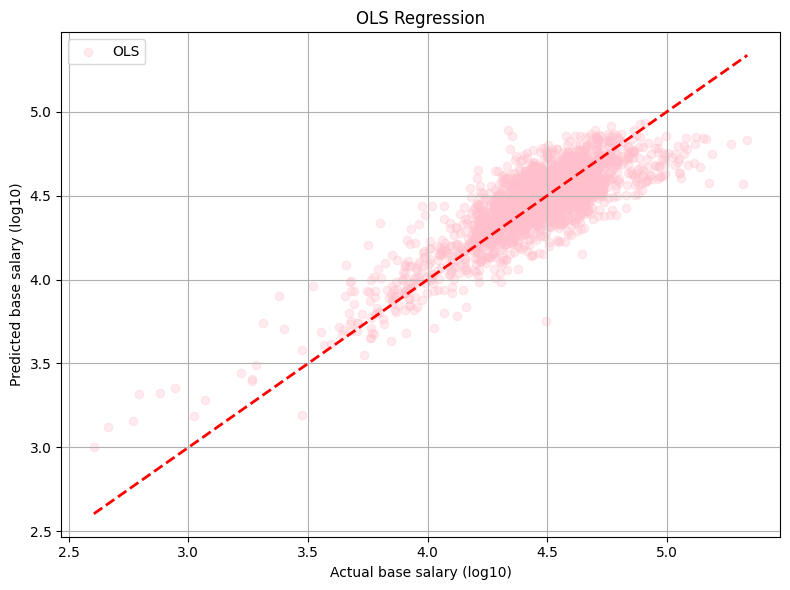



Significant variables (p-value < 0.05):
['bonus', 'overtime_pay', 'other', 'age', 'duration_total', 'duration_entity', 'duration_nominal', 'duration_overtime', 'education_2', 'education_3', 'education_4', 'education_5', 'education_6', 'section_07_2', 'sex_2', 'contract_2']

OLS reduced - MSE: 0.02
OLS reduced - R²: 0.7117
                            OLS Regression Results                            
Dep. Variable:                   base   R-squared:                       0.724
Model:                            OLS   Adj. R-squared:                  0.724
Method:                 Least Squares   F-statistic:                     1442.
Date:                Mon, 05 May 2025   Prob (F-statistic):               0.00
Time:                        23:37:23   Log-Likelihood:                 4106.7
No. Observations:                8800   AIC:                            -8179.
Df Residuals:                    8783   BIC:                            -8059.
Df Model:                          16     

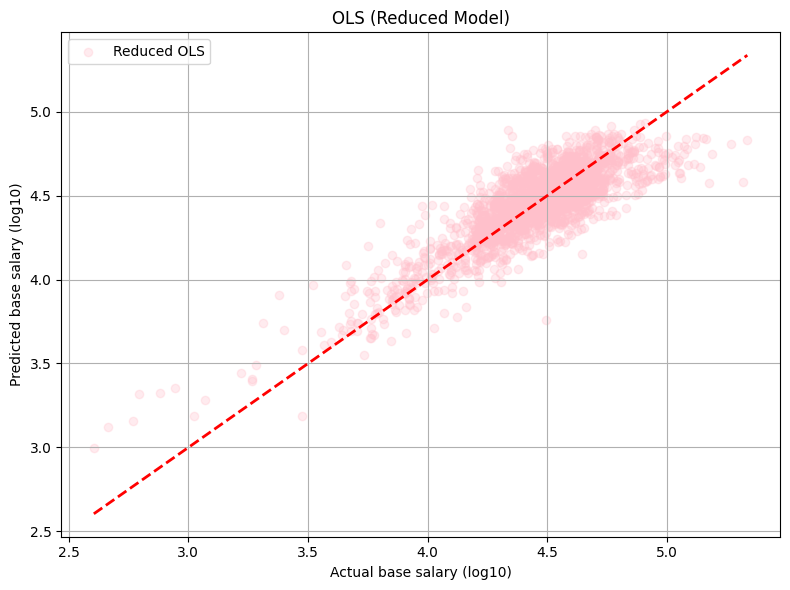



OLS full - MSE: 0.02
OLS full - R²: 0.7322
                            OLS Regression Results                            
Dep. Variable:                   base   R-squared:                       0.726
Model:                            OLS   Adj. R-squared:                  0.725
Method:                 Least Squares   F-statistic:                     1279.
Date:                Mon, 05 May 2025   Prob (F-statistic):               0.00
Time:                        23:37:24   Log-Likelihood:                 4408.8
No. Observations:                8712   AIC:                            -8780.
Df Residuals:                    8693   BIC:                            -8645.
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------

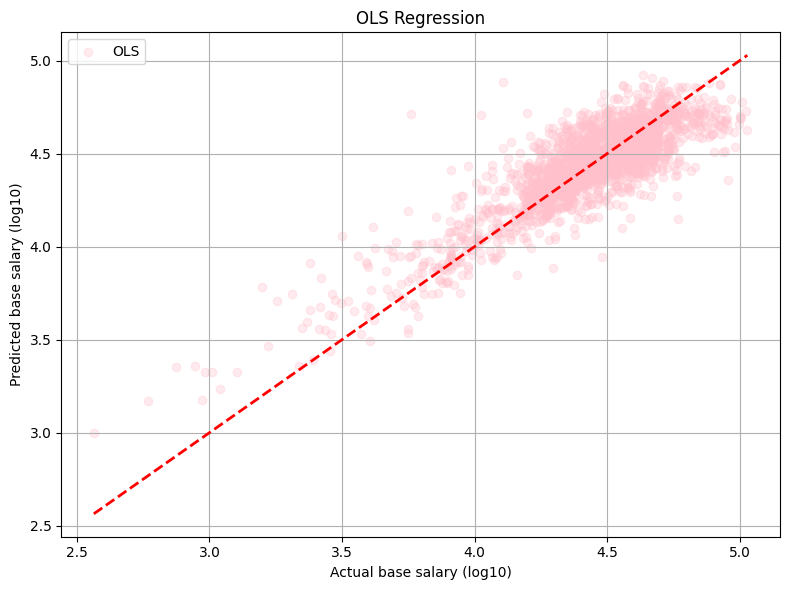



Significant variables (p-value < 0.05):
['bonus', 'overtime_pay', 'other', 'age', 'duration_total', 'duration_entity', 'duration_nominal', 'duration_overtime', 'education_3', 'education_4', 'education_5', 'education_6', 'section_07_2', 'sex_2', 'contract_2']

OLS reduced - MSE: 0.02
OLS reduced - R²: 0.7319
                            OLS Regression Results                            
Dep. Variable:                   base   R-squared:                       0.726
Model:                            OLS   Adj. R-squared:                  0.725
Method:                 Least Squares   F-statistic:                     1535.
Date:                Mon, 05 May 2025   Prob (F-statistic):               0.00
Time:                        23:37:24   Log-Likelihood:                 4408.0
No. Observations:                8712   AIC:                            -8784.
Df Residuals:                    8696   BIC:                            -8671.
Df Model:                          15                    

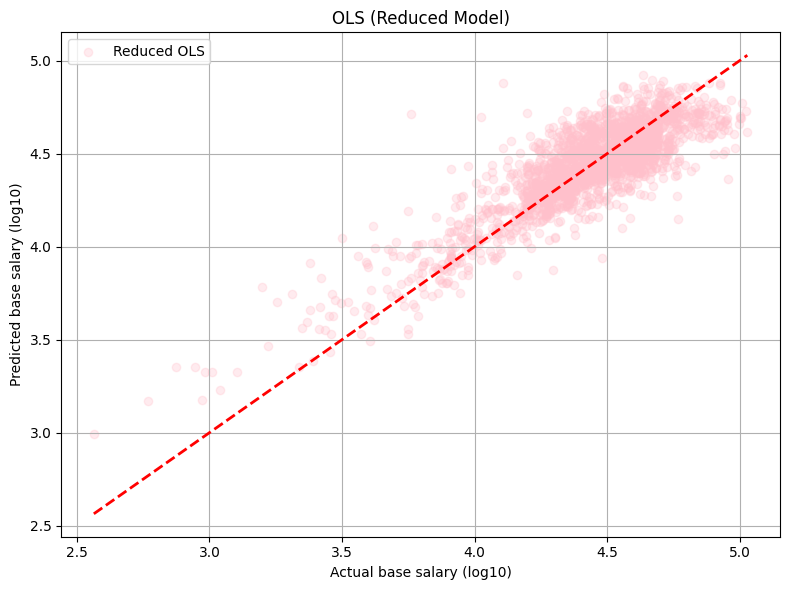

In [46]:
selected_columns = ['base', 'bonus', 'overtime_pay', 'other', 'age',
                    'duration_total', 'duration_entity', 'duration_nominal', 'duration_overtime']
percent =  [1, 0.99]
for p in percent:

    df_log10 = pd.read_csv('earnings.csv', sep=';')
    df_log10[selected_columns] = np.log10(df_log10[selected_columns] + 1)

    percentile = df_log10['base'].quantile(p)
    df_log10 = df_log10[df_log10['base'] <= percentile]

    X = df_log10.drop(columns=['base', 'id'])
    y = df_log10['base']

    X = pd.get_dummies(X, columns=['education', 'sector', 'section_07', 'sex', 'contract'], drop_first=True)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    scaler = StandardScaler()
    X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns, index=X_train.index)
    X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns, index=X_test.index)

    X_train_const = sm.add_constant(X_train_scaled)
    X_test_const = sm.add_constant(X_test_scaled)

    model = sm.OLS(y_train, X_train_const)
    results = model.fit()

    # Full model prediction
    y_pred = results.predict(X_test_const)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    print(f"\nOLS full - MSE: {mse:.2f}")
    print(f"OLS full - R²: {r2:.4f}")
    print(results.summary())

    plt.figure(figsize=(8, 6))
    plt.scatter(y_test, y_pred, alpha=0.3, color='pink', label="OLS")
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
    plt.xlabel('Actual base salary (log10)')
    plt.ylabel('Predicted base salary (log10)')
    plt.title('OLS Regression')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

    print ()

    # Feature selection based on p-values
    p_values = results.pvalues
    significant_vars = p_values[p_values < 0.05].index
    significant_vars = [var for var in significant_vars if var != 'const']
    print("\nSignificant variables (p-value < 0.05):")
    print(significant_vars)

    X_train_reduced = X_train_scaled[significant_vars]
    X_test_reduced = X_test_scaled[significant_vars]

    X_train_reduced_const = sm.add_constant(X_train_reduced)
    X_test_reduced_const = sm.add_constant(X_test_reduced)

    reduced_model = sm.OLS(y_train, X_train_reduced_const).fit()


    y_pred_reduced = reduced_model.predict(X_test_reduced_const)
    mse_reduced = mean_squared_error(y_test, y_pred_reduced)
    r2_reduced = r2_score(y_test, y_pred_reduced)
    print(f"\nOLS reduced - MSE: {mse_reduced:.2f}")
    print(f"OLS reduced - R²: {r2_reduced:.4f}")
    print(reduced_model.summary())

    # Comparison plot
    plt.figure(figsize=(8, 6))
    plt.scatter(y_test, y_pred_reduced, alpha=0.3, color='pink', label="Reduced OLS")
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
    plt.xlabel('Actual base salary (log10)')
    plt.ylabel('Predicted base salary (log10)')
    plt.title('OLS (Reduced Model)')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()
    print()